In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor

In [10]:
from warnings import filterwarnings
filterwarnings("ignore")

In [11]:
# Data
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [34]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

### Model 

In [35]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

In [36]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Text(0, 0.5, 'Salary')

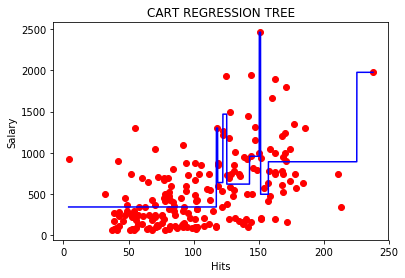

In [37]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color = 'red')

plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')

plt.title("CART REGRESSION TREE")
plt.xlabel("Hits")
plt.ylabel("Salary")

### Prediction

In [38]:
# Single Variable
y_pred = cart_model.predict(X_test)

In [39]:
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

In [48]:
# All Variables
# Data
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [49]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

In [50]:
y_pred2 = cart_model.predict(X_test)

In [51]:
np.sqrt(mean_squared_error(y_test, y_pred2))

469.9246109023524

### Model Tuning

In [54]:
cart_model = DecisionTreeRegressor(max_depth = 3).fit(X_train, y_train)
y_pred2 = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred2))

391.5530522634767

In [55]:
cart_params = {"max_depth": [2,3,4,5,10,20],
               "min_samples_split": [2,10,5,30,50,10]}

In [57]:
cart_model = DecisionTreeRegressor()

In [58]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   13.3s finished


In [59]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

### Final Model

In [60]:
cart_tuned = DecisionTreeRegressor(max_depth = 4, min_samples_split = 50).fit(X_train, y_train)

In [61]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

361.0876906511434